In [4]:
import torch
import numpy as np
import pandas as pd

# 1D Tensors

file:///home/gopesh/Pictures/Screenshot%20from%202019-01-09%2012-21-16.png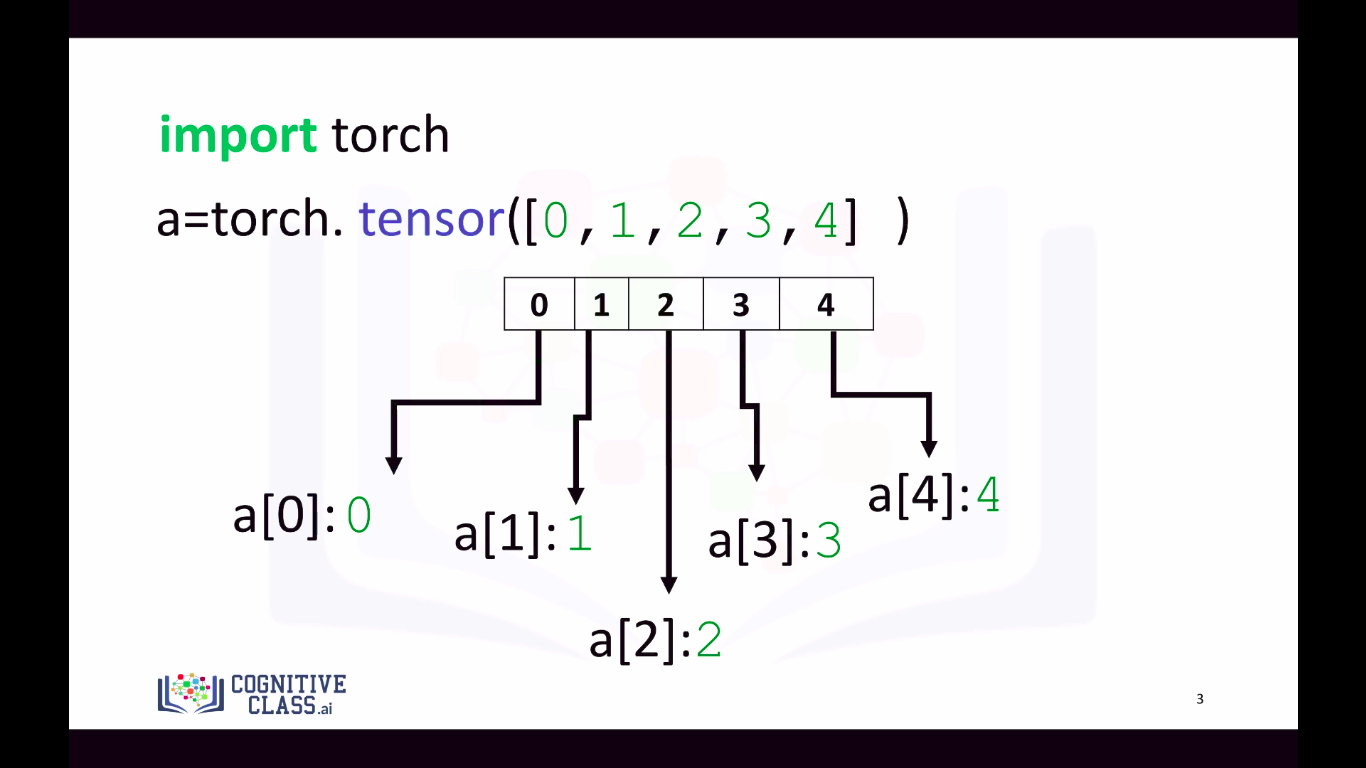

#### The data type of all the elements of a torch tensor should be same, as in Numpy.

In [5]:
a=torch.tensor([1,2,3,4])

In [6]:
b=torch.tensor([1,2,3,4.0]) # all the elements gets casted to torch.flaot32

In [7]:
b,b.type(),b.dtype

(tensor([1., 2., 3., 4.]), 'torch.FloatTensor', torch.float32)

In [17]:
a,a.type(),a.dtype

(tensor([3, 2, 3, 4]), 'torch.LongTensor', torch.int64)

In [18]:
c=torch.tensor([1,2,3,4.1])
c,c.type(),c.dtype

(tensor([1.0000, 2.0000, 3.0000, 4.1000]), 'torch.FloatTensor', torch.float32)

In [19]:
a[0]=3  # not immutable
print(a[0],a[0].shape)
# notice that a[0] represents a tensor

tensor(3) torch.Size([])


In [20]:
a,a.shape

(tensor([3, 2, 3, 4]), torch.Size([4]))

###  Datatypes
file:///home/gopesh/Pictures/Screenshot%20from%202019-01-09%2013-24-56.png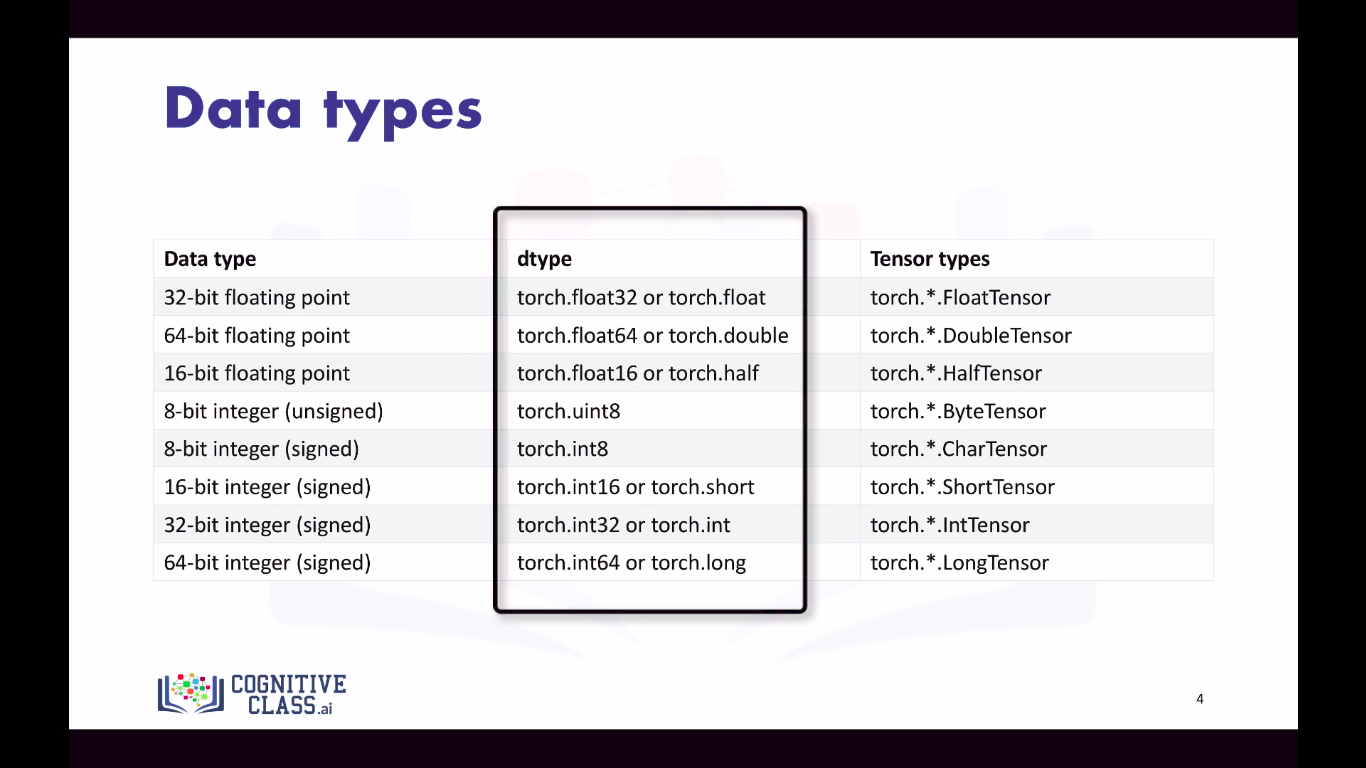

In [13]:
e=torch.FloatTensor([1,2,3,4,5])
print(e)
print(e.dtype,e.type())

tensor([1., 2., 3., 4., 5.])
torch.float32 torch.FloatTensor


In [22]:
d=torch.FloatTensor(a) # cant convert a LongTensor to float like this

TypeError: expected torch.FloatTensor (got torch.LongTensor)

In [36]:
a.type(torch.FloatTensor) 

tensor([3., 2., 3., 4.])

In [37]:
a # hence not inplace

tensor([3, 2, 3, 4])

#### Size and Dimensions

In [29]:
q=torch.tensor([0,1,2,3,4,5])
q.size(),q.ndimension()

(torch.Size([6]), 1)

#### Reshaping

In [54]:
print(q.view(1,6))
print(q.view(6,1))
print(q) # hence not inplace

tensor([[0, 1, 2, 3, 4, 5]])
tensor([[0],
        [1],
        [2],
        [3],
        [4],
        [5]])
tensor([0, 1, 2, 3, 4, 5])


#### Casting Numpy to Torch

In [30]:
# TORCH -> NUMPY
k=np.array(q) # deep copy
print(k)
k[0]=10
print(q,k)

[0 1 2 3 4 5]
tensor([0, 1, 2, 3, 4, 5]) [10  1  2  3  4  5]


In [31]:
k=q.numpy() # shallow copy
print(k)
k[0]=10 ## q changes
print(q)
print(k)

[0 1 2 3 4 5]
tensor([10,  1,  2,  3,  4,  5])
[10  1  2  3  4  5]


In [32]:
# NUMPY -> TORCH
w=torch.tensor(k)  # deep copy
print(w)
w[0]=0
print(w)
print(k)


tensor([10,  1,  2,  3,  4,  5])
tensor([0, 1, 2, 3, 4, 5])
[10  1  2  3  4  5]


In [33]:
e=torch.from_numpy(k) # shallow copy
print(e)
e[0]=0
print(e)
print(k)

tensor([10,  1,  2,  3,  4,  5])
tensor([0, 1, 2, 3, 4, 5])
[0 1 2 3 4 5]


 We can convert a pandas' series by simply using .values attrib , returning a numpy array
 that can be converted to torch tensor using above methods and functions

#### Indexing and Slicing


In [35]:
n=torch.tensor(np.arange(10))
print(n)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


In [36]:
n[:2]=10.01 
n

tensor([10, 10,  2,  3,  4,  5,  6,  7,  8,  9])

In [37]:
f=n[3:7]
print(f, f.type(), f.dtype)

tensor([3, 4, 5, 6]) torch.LongTensor torch.int64


In [38]:
n[3:5]=torch.tensor([300.0,500.1])
print(n,n.dtype,n.type())

tensor([ 10,  10,   2, 300, 500,   5,   6,   7,   8,   9]) torch.int64 torch.LongTensor


### Basic Operations

In [39]:
n=torch.tensor(np.arange(10))
m=torch.tensor(np.arange(10))
n+m

tensor([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [ ]:
n/m # 0/0 kernel dies

In [43]:
n+1

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [41]:
n[1:]/m[1:]

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1])

In [45]:
n*3

tensor([ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27])

In [42]:
n*m

tensor([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [46]:
sum(n*m)

tensor(285)

In [47]:
torch.dot(n,m),torch.dot(m,n)

(tensor(285), tensor(285))

#### Universal Functions

In [48]:
torch.mean(n) # or n.mean()


RuntimeError: Can only calculate the mean of floating types. Got Long instead.

In [53]:
n.type(torch.FloatTensor).mean()

tensor(4.5000)

In [54]:
n.min(),n.max()

(tensor(0), tensor(9))

In [58]:
torch.linspace(-2,2,9)

tensor([-2.0000, -1.5000, -1.0000, -0.5000,  0.0000,  0.5000,  1.0000,  1.5000,
         2.0000])

In [57]:
# we have trigonometric functions
p=np.pi
r=torch.tensor([0,p/2,p,2*p/3])
torch.sin(r)

tensor([ 0.0000,  1.0000, -0.0000,  0.8660])

### Using Matplotlib

In [59]:
import matplotlib.pyplot as plt


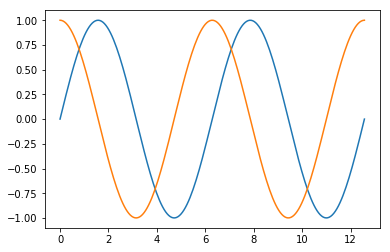

In [62]:
x=torch.linspace(0,4*p,200)
y=torch.sin(x)
z=torch.cos(x)
plt.plot(x.numpy(),y.numpy())
plt.plot(x.numpy(),z.numpy())
# cant input torch tensor directly to a plt method

# 2D tensor

#### Creation

In [70]:
a=torch.tensor(([1,2,3],[2,3,4],[3,4,5]))
a,a.type(),a.size(),a.shape,a.ndimension(),a.numel()


(tensor([[1, 2, 3],
         [2, 3, 4],
         [3, 4, 5]]),
 'torch.LongTensor',
 torch.Size([3, 3]),
 torch.Size([3, 3]),
 2,
 9)

file:///home/gopesh/Pictures/Screenshot%20from%202019-01-09%2013-45-03.png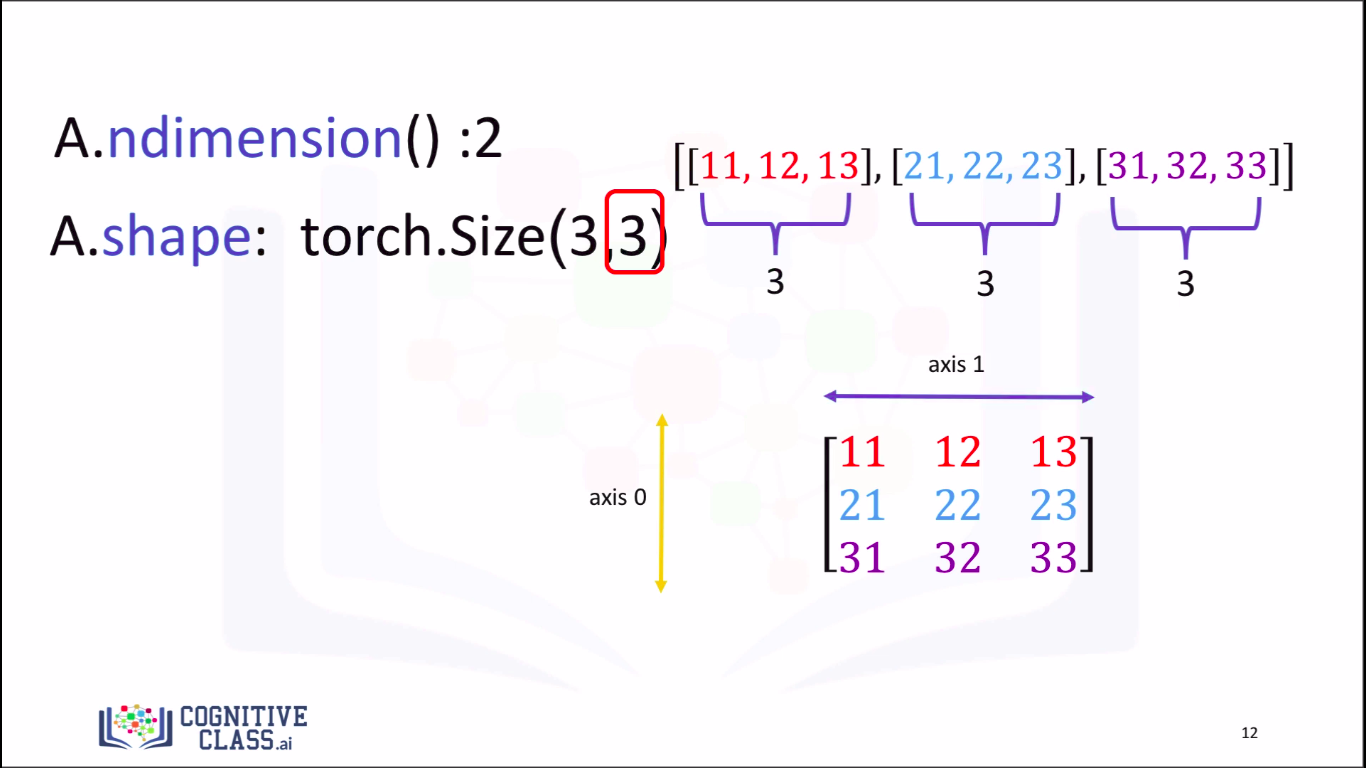

In [64]:
b=torch.tensor(([1,2,3],[2,3,4],[3,5]))

ValueError: expected sequence of length 3 at dim 1 (got 2)

### Indexing and slicing

In [67]:
# similar to numpy
a[:,1]
# can also use double bracket notation instead of 'comma' notation

tensor([2, 3, 4])

### Basic Operations


In [72]:
# Multiplication with scalar
b=a*2
print(a)
print(b)

tensor([[1, 2, 3],
        [2, 3, 4],
        [3, 4, 5]])
tensor([[ 2,  4,  6],
        [ 4,  6,  8],
        [ 6,  8, 10]])


In [73]:
# Matrix Addition
b+a


tensor([[ 3,  6,  9],
        [ 6,  9, 12],
        [ 9, 12, 15]])

In [75]:
# Adding a scalar

a+1

tensor([[2, 3, 4],
        [3, 4, 5],
        [4, 5, 6]])

In [76]:
# elementwise multiplication  'HADAMARD PRODUCT'

print(b*a)
print(a*b)

tensor([[ 2,  8, 18],
        [ 8, 18, 32],
        [18, 32, 50]])
tensor([[ 2,  8, 18],
        [ 8, 18, 32],
        [18, 32, 50]])


In [78]:
c=torch.tensor([1,2,3])

In [79]:
# Broadcasting and Multiplication

a*c

tensor([[ 1,  4,  9],
        [ 2,  6, 12],
        [ 3,  8, 15]])

In [80]:
a*c.view(3,1)

tensor([[ 1,  2,  3],
        [ 4,  6,  8],
        [ 9, 12, 15]])

In [81]:
#Multiplication with scalar 

a*2

tensor([[ 2,  4,  6],
        [ 4,  6,  8],
        [ 6,  8, 10]])

In [82]:
# MATRIX MULTIPLICATION

torch.mm(a,b)

tensor([[ 28,  40,  52],
        [ 40,  58,  76],
        [ 52,  76, 100]])

In [83]:
w=torch.tensor(np.arange(1,10).reshape(3,3))
w

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [85]:
# Sum of elements
w.sum(dim=1),w.sum(dim=0)

(tensor([ 6, 15, 24]), tensor([12, 15, 18]))

In [86]:
torch.sum(w)

tensor(45)